In [20]:
import pandas as pd 
import pygaps as pg 
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('mock_langmuir.csv')

In [22]:
df.columns

Index(['C_mg_per_L', 'q_mg_per_g', 'q_no_noise', 'noise_std'], dtype='object')

In [23]:
isotherm = pg.PointIsotherm(
    pressure=df['C_mg_per_L'],
    loading=df['q_mg_per_g'],
    material='Agarose',
    adsorbate='IgG',
    temperature=25,
)

Specified adsorbate is not in internal list (or name cannot be resolved to an existing one). Thermodynamic backend disabled for this gas/vapour.


In [24]:
model_isotherm = pg.ModelIsotherm.from_pointisotherm(
    isotherm,
    branch='ads',
    model='Langmuir'
    ,verbose=True
)


Specified adsorbate is not in internal list (or name cannot be resolved to an existing one). Thermodynamic backend disabled for this gas/vapour.
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 0.0232


In [25]:
K = model_isotherm.model.params['K']
Qmax = model_isotherm.model.params['n_m']
K , Qmax

(np.float64(0.04895492736028919), np.float64(196.8702749411324))

In [26]:
df['Computed_q'] = (Qmax * K * df['C_mg_per_L'])/(1+K * df['C_mg_per_L'])

In [27]:
df['Computed_q']

0       0.959082
1       5.120241
2       9.108311
3      12.933870
4      16.606655
5      20.135637
6      23.529099
7      26.794702
8      29.939537
9      32.970183
10     35.892747
11     38.712911
12     44.697610
13     68.454125
14     85.794740
15     99.009345
16    109.413980
17    117.818783
18    124.749773
19    130.563358
20    135.509600
21    139.769127
22    146.868880
23    156.826644
24    163.476921
25    168.232896
26    171.803042
27    174.581699
28    176.805809
29    178.626318
Name: Computed_q, dtype: float64

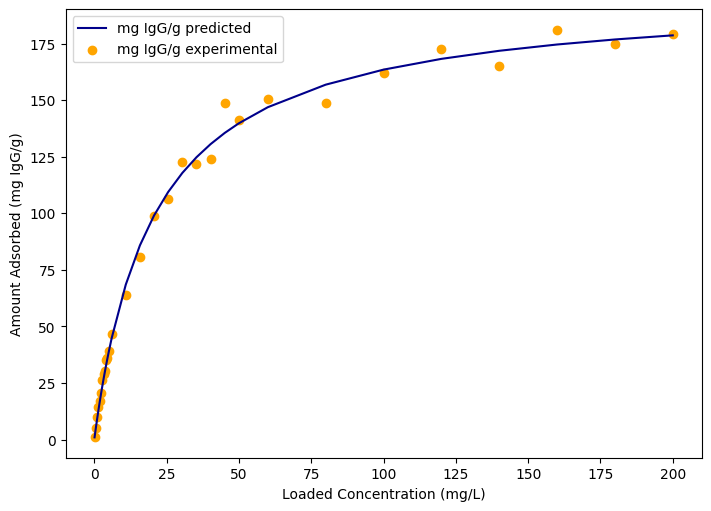

In [30]:
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
ax.plot(df['C_mg_per_L'],df['Computed_q'],color='darkblue',label='mg IgG/g predicted')
ax.scatter(df['C_mg_per_L'],df['q_mg_per_g'],color='orange',label='mg IgG/g experimental')
plt.xlabel('Loaded Concentration (mg/L)')
plt.ylabel('Amount Adsorbed (mg IgG/g)')
plt.legend()
plt.show()
